## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.



# Pyber Ride Sharing


## Analysis
### Observed Trend 1 
There are more number of drivers and rides in the Urban area compared with Suburban and Rural

### Observed Trend 2 
1% of total drivers in Rural area earns 6.6% of total fare revenue.

### Observed Trend 3
Suburban makes half of the Urban revenue  "$20k" comapred with $40k" with 13% of total drivers 


In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [189]:
# Read combined csv file
csvpath = os.path.join( 'raw_Data', 'city_data.csv')
csvpath1 = os.path.join( 'raw_Data', 'ride_data.csv')
city_df = pd.read_csv(csvpath)
ride_df = pd.read_csv(csvpath1)

In [190]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [191]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [192]:
combined = pd.merge(city_df,ride_df, on="city", how="outer")

In [193]:
combined.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [194]:
#create variables for city type, used for scatter plot
urban=combined[combined["type"]=="Urban"]
suburban=combined[combined["type"]=="Suburban"]
rural=combined[combined["type"]=="Rural"]

In [195]:
# Create counts for rides, fares and drivers
urban_ride=urban.groupby(["city"]).count()["ride_id"]
urban_fare=urban.groupby(["city"]).mean()["fare"]
urban_driver=urban.groupby(["city"]).mean()["driver_count"]

suburban_ride=suburban.groupby(["city"]).count()["ride_id"]
suburban_fare=suburban.groupby(["city"]).mean()["fare"]
suburban_driver=suburban.groupby(["city"]).mean()["driver_count"]

rural_ride=rural.groupby(["city"]).count()["ride_id"]
rural_fare=rural.groupby(["city"]).mean()["fare"]
rural_driver=rural.groupby(["city"]).mean()["driver_count"]




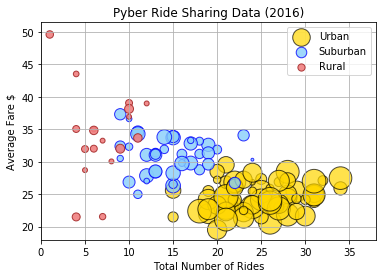

In [196]:
#Put a scatter chart for all variables
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare $")
plt.xlabel("Total Number of Rides")
plt.grid(True)

plt.xlim((0, 38))
plt.scatter(urban_ride,urban_fare,linewidth=1, marker="o", color="gold", alpha=0.7, 
            label="Urban", s=urban_driver*8, edgecolor = "black")
plt.scatter(suburban_ride,suburban_fare,linewidth=1, marker="o", color="lightskyblue", alpha=0.8, 
            label="Suburban",s=suburban_driver*8,edgecolor = "blue" )
plt.scatter(rural_ride,rural_fare,linewidth=1, marker="o", color="lightcoral", alpha=0.9, 
            label="Rural",s=rural_driver*8,edgecolor = "brown")
plt.legend(loc="best")
plt.savefig("Pyber Ride Sharing Data.png")
plt.show()

In [197]:
# Total fare by city type
city_type = combined.groupby("type")["fare"].sum().reset_index()
city_type

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


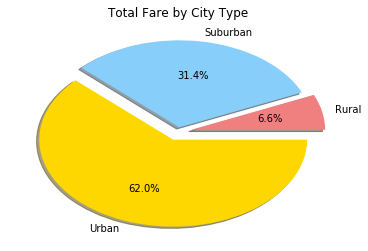

In [198]:
plt.pie(city_type["fare"], labels=city_type["type"],colors=["lightcoral","lightskyblue","gold"],
        shadow=True,explode = (0.1,0.05,.1), autopct= "%1.1f%%")
plt.title('Total Fare by City Type')
plt.savefig("Total Fare by city.png")
plt.show()

In [199]:
#Total ride per city type
city_ride = combined.groupby("type")["fare"].count().reset_index()

In [200]:
city_ride

,type,fare
0,Rural,125
1,Suburban,657
2,Urban,1625


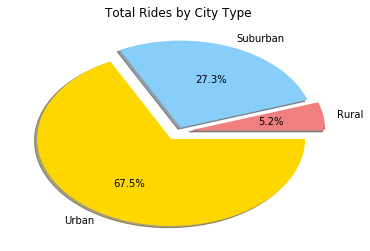

In [201]:
plt.pie(city_ride["fare"], labels=city_type["type"],colors=["lightcoral","lightskyblue","gold"],
        shadow=True,explode = (0.1,0.05,.1), autopct= "%1.1f%%")
plt.title('Total Rides by City Type')
plt.savefig("Total Rides by city.png")
plt.show()

In [202]:
#Total driver per city type
city_driver = combined.groupby("type")["driver_count"].sum().reset_index()

In [203]:
city_driver

,type,driver_count
0,Rural,727
1,Suburban,9730
2,Urban,64501


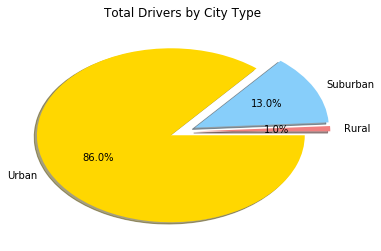

In [204]:
plt.pie(city_driver["driver_count"], labels=city_type["type"],colors=["lightcoral","lightskyblue","gold"],
        shadow=True,explode = (0.1,0.1,0.1), autopct= "%1.1f%%")
plt.title('Total Drivers by City Type')
plt.savefig("Total Drivers by city.png")
plt.show()